# Acoustic Features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
acoustics = pd.read_csv("acoustic_features.csv")
billboard = pd.read_csv("albums.csv")
# pitchfork = pd.read_csv("reviews.csv")
# billboard_pitchfork = pd.read_pickle("./grouped_billboard.pkl")
# all_data = pd.read_pickle('./BILLFUZZYPITCHFINISHED.pkl')

`mode`: Major = 1, Minor = 0
`key`: C = 0.0, increments by half-steps up to B which is 11.0

### Prepare Data

### Billboard Association

In [3]:
## Group acoustics by artist + album --> reset index to MultiIndex on ['artist', 'album']
af_data_keys = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence'];
acoustic_data = acoustics[['artist', 'album'] + af_data_keys].dropna()

## Only need some billboard data
billboard_data = billboard[['artist', 'album', 'rank']].dropna()
billboard_data = billboard_data.groupby(['artist', 'album'])[['rank']].agg(min)
billboard_data.columns = billboard_data.columns.get_level_values(0)

In [4]:
## Merge the datasets
acousticbb_data = acoustic_data.merge(billboard_data, how = 'inner', left_on = ['artist', 'album'], right_on = ['artist', 'album']);

print("Original acoustic / final dataframe shape:")
print(acoustic_data.shape)
print(acousticbb_data.dropna().shape)

Original acoustic / final dataframe shape:
(339799, 14)
(339799, 15)


#### Pairplot & Correlation Matrix

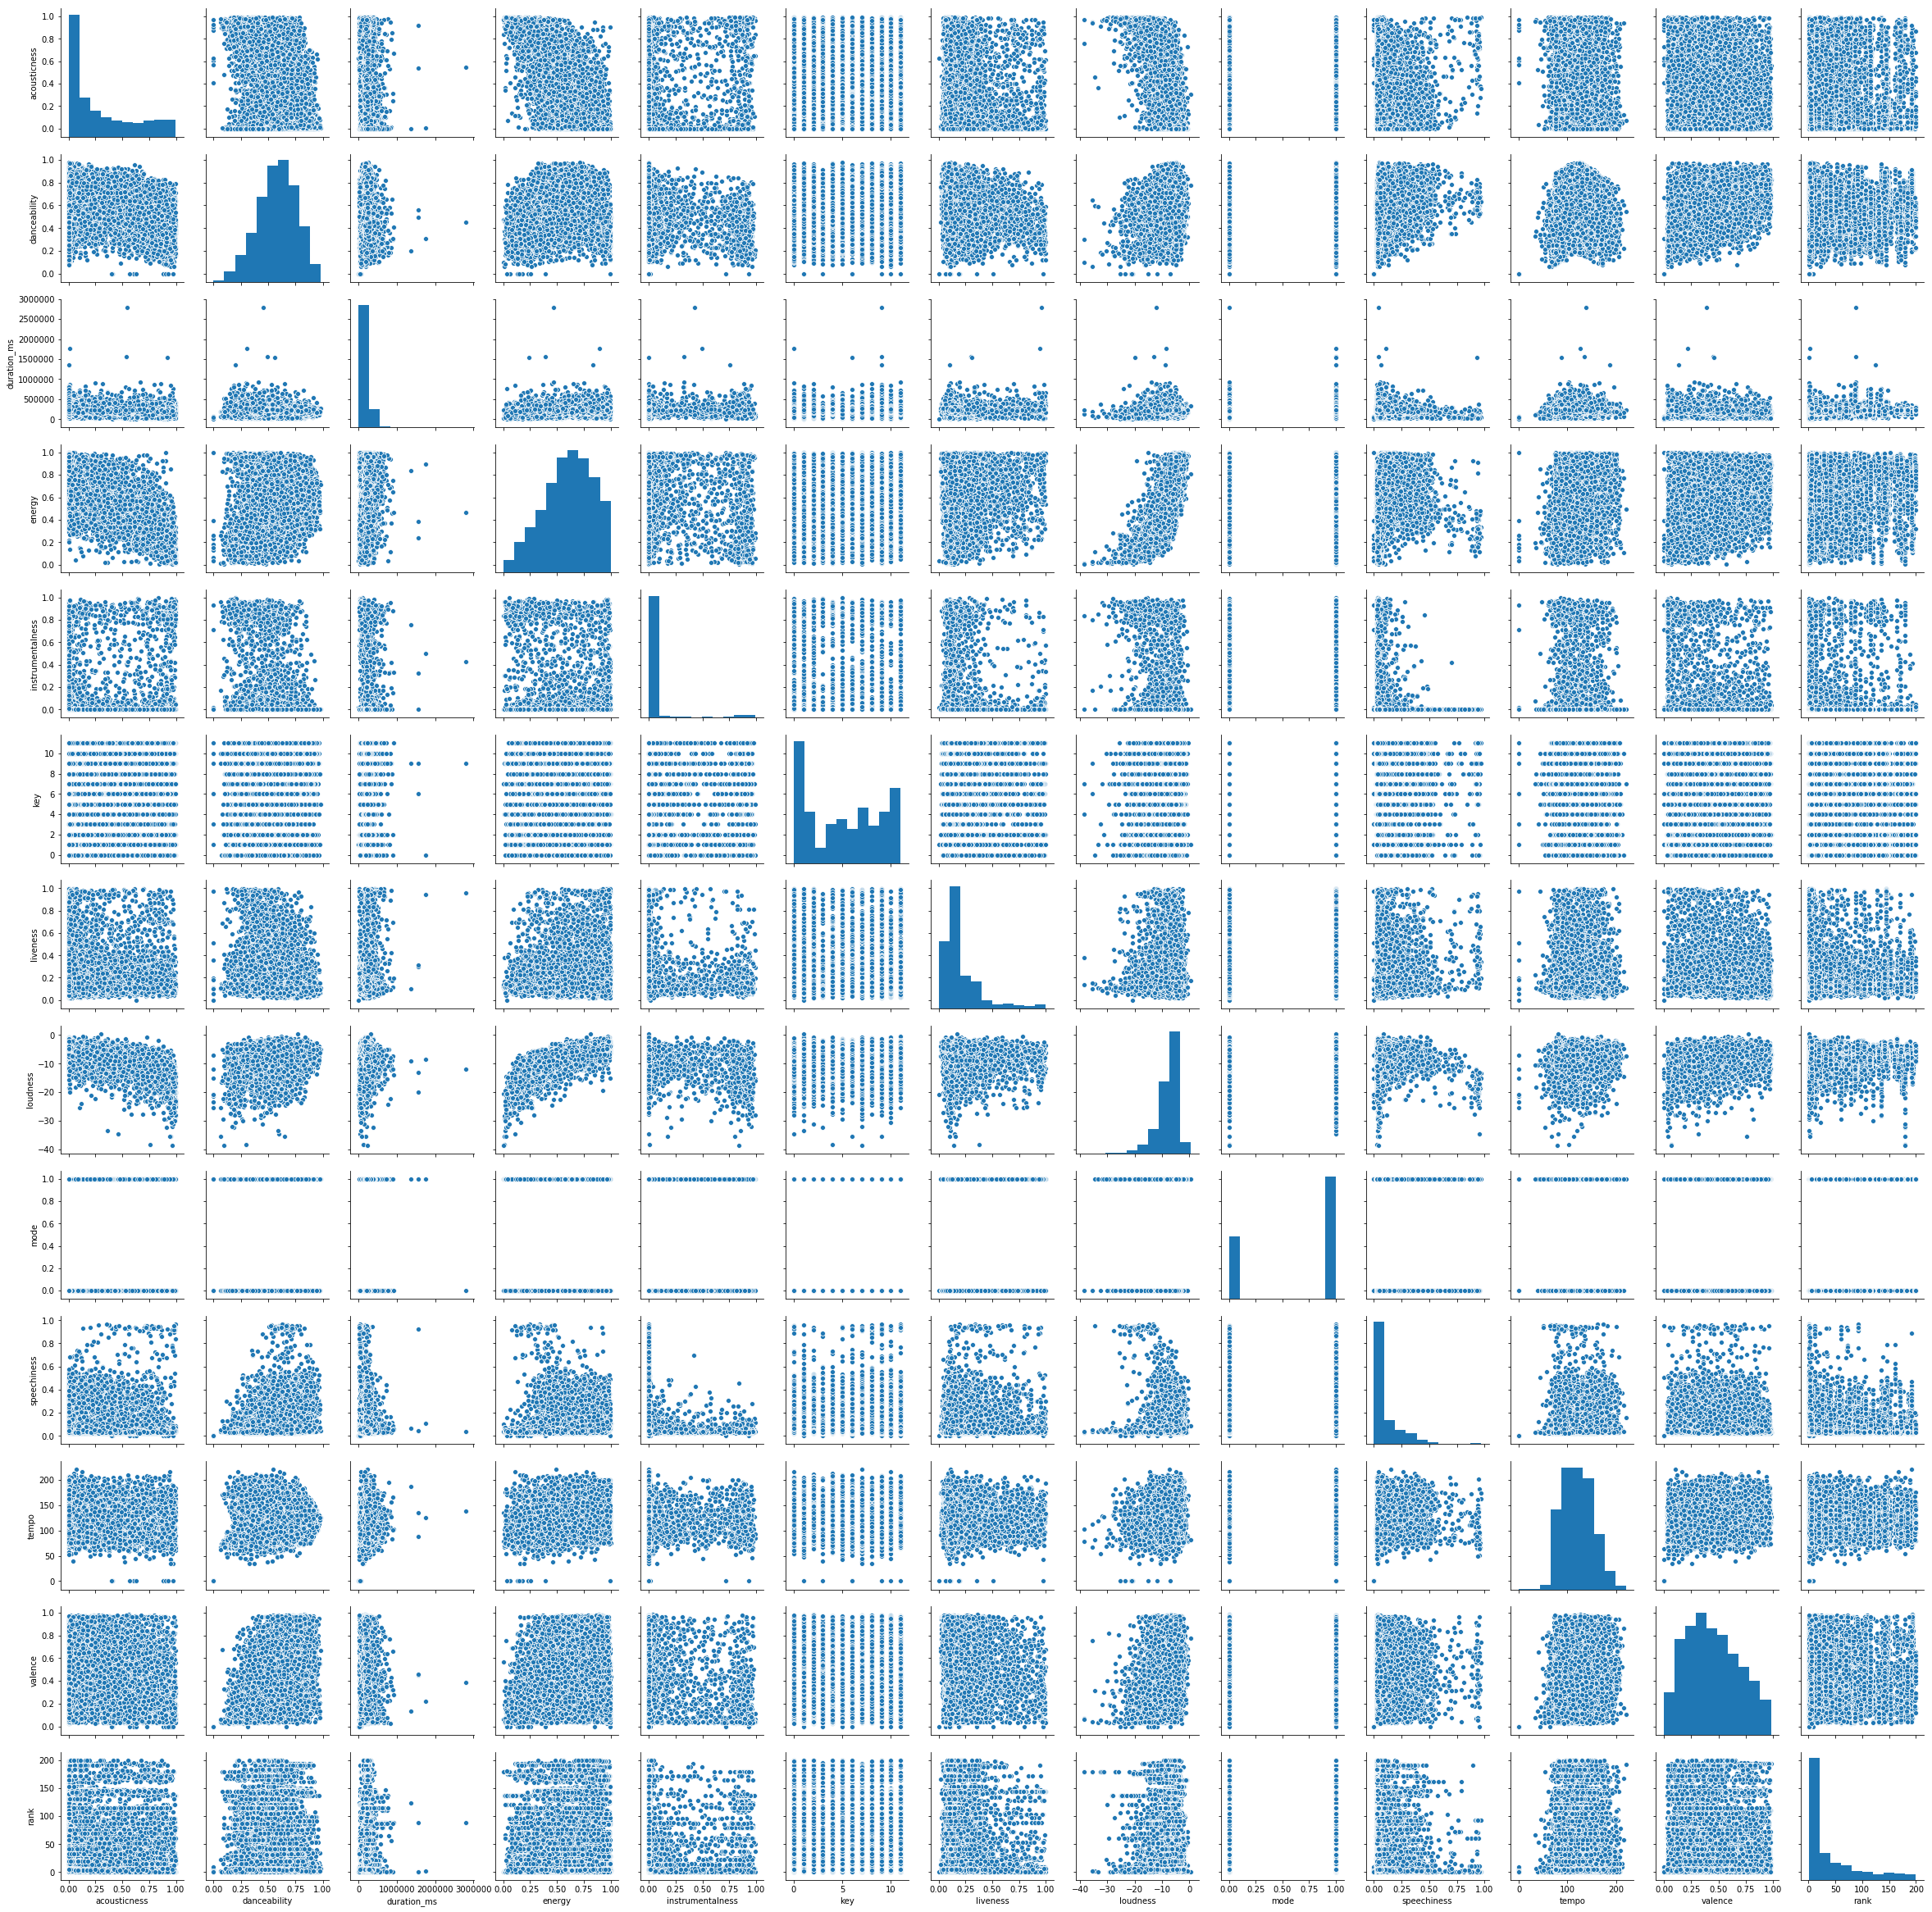

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,rank
acousticness,1.000000,-0.196245,-0.120949,-0.706207,0.118138,-0.023548,-0.006694,-0.564874,0.080622,0.008277,-0.175597,-0.219184,0.078527
danceability,-0.196245,1.000000,-0.059958,0.110363,-0.190994,0.022932,-0.152606,0.147712,-0.070243,0.174174,-0.110415,0.528247,-0.063117
duration_ms,-0.120949,-0.059958,1.000000,0.067977,0.045624,0.004758,0.067654,0.045632,-0.048022,-0.079262,0.018741,-0.123794,-0.007234
energy,-0.706207,0.110363,0.067977,1.000000,-0.119490,0.030206,0.168978,0.760206,-0.068125,0.101827,0.213848,0.312593,-0.054419
instrumentalness,0.118138,-0.190994,0.045624,-0.119490,1.000000,-0.007926,-0.034715,-0.275935,-0.040215,-0.106122,-0.022825,-0.157912,0.102455
key,-0.023548,0.022932,0.004758,0.030206,-0.007926,1.000000,-0.000565,0.016887,-0.162258,0.031916,-0.002499,0.026532,-0.000747
liveness,-0.006694,-0.152606,0.067654,0.168978,-0.034715,-0.000565,1.000000,0.044388,0.010772,0.221460,0.002441,-0.026770,0.011881
loudness,-0.564874,0.147712,0.045632,0.760206,-0.275935,0.016887,0.044388,1.000000,-0.029998,-0.001124,0.170974,0.179312,-0.101858
mode,0.080622,-0.070243,-0.048022,-0.068125,-0.040215,-0.162258,0.010772,-0.029998,1.000000,-0.085274,0.014724,-0.000469,0.024217
speechiness,0.008277,0.174174,-0.079262,0.101827,-0.106122,0.031916,0.221460,-0.001124,-0.085274,1.000000,-0.031299,0.047409,-0.044872


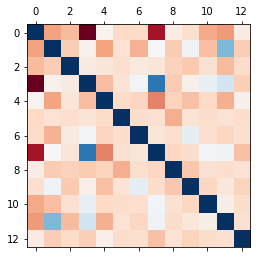

In [5]:
sns.pairplot(acousticbb_data[:10000])
plt.show()

plt.matshow(acousticbb_data.corr(), cmap = "RdBu")
acousticbb_data.corr()

## Regression

In [6]:
## Run the Regression
X = acousticbb_data[af_data_keys]
Y = acousticbb_data['rank']

# (u, s, vt) = np.linalg.svd(X)
# print("SVD: ", u.shape, s.shape, vt.shape)

analytical_thetas = np.linalg.pinv(X) @ Y;

loss_values = X @ analytical_thetas - Y

In [7]:
from sklearn import linear_model
from scipy import stats
import statsmodels.api as sm

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                 4.539e+04
Date:                Sat, 15 Jun 2019   Prob (F-statistic):               0.00
Time:                        05:01:46   Log-Likelihood:            -1.8706e+06
No. Observations:              339799   AIC:                         3.741e+06
Df Residuals:                  339787   BIC:                         3.741e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness        21.6289      0.425     50.910      0.000      20.796      22.462
danceability        -1.2179      0.666     -1.828      0.068      -2.524       0.088
duration_ms       1.131e-05   9.97e-07     11.346      0.000    9.36e-06    1.33e-05
energy              41.9643      0.612     68.569      0.000      40.765      43.164
instrumentalness    16.5043      0.455     36.249      0.000      15.612      17.397
key                  0.2966      0.029     10.310      0.000       0.240       0.353
liveness             3.4587      0.512      6.757      0.000       2.455       4.462
loudness            -2.3307      0.029    -79.589      0.000      -2.388      -2.273
mode                 4.5304      0.225     20.169      0.000       4.090       4.971
speechiness        -23.4058      0.853    -27.443      0.000     -25.077     -21.734
tempo                0.0693      0.003     21.817      0.000       0.063       0.076
valence             11.0558      0.511     21.623      0.000      10.054      12.058
==============================================================================
Omnibus:                    73937.857   Durbin-Watson:                   0.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25634.721
Skew:                           0.473   Prob(JB):                         0.00
Kurtosis:                       2.042   Cond. No.                     2.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""